# Consolidating the Data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Data/clickbait_data.csv')

In [3]:
data

,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1
...,...,...
31995,"To Make Female Hearts Flutter in Iraq, Throw a...",0
31996,"British Liberal Democrat Patsy Calton, 56, die...",0
31997,Drone smartphone app to help heart attack vict...,0
31998,"Netanyahu Urges Pope Benedict, in Israel, to D...",0


# Pre-processing Text

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/taejoon/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /Users/taejoon/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /Users/taejoon/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [8]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

In [15]:
tokenized_data = data
for i in range(len(data)):
    tokenized_data['headline'][i] = tokenizer.tokenize(data['headline'][i])

/Users/taejoon/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
tokenized_data

,headline,clickbait
0,"[should, i, get, bings]",1
1,"[which, tv, female, friend, group, do, you, be...",1
2,"[the, new, star, wars, the, force, awakens, tr...",1
3,"[this, vine, of, new, york, on, celebrity, big...",1
4,"[a, couple, did, a, stunning, photo, shoot, wi...",1
...,...,...
31995,"[to, make, female, hearts, flutter, in, iraq, ...",0
31996,"[british, liberal, democrat, patsy, calton, 56...",0
31997,"[drone, smartphone, app, to, help, heart, atta...",0
31998,"[netanyahu, urges, pope, benedict, in, israel,...",0


In [18]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

In [20]:
filtered_data=[]
for w in tokenized_data:
    if w not in stop_words:
        filtered_data.append(w)

In [21]:
filtered_data

['headline', 'clickbait']

In [ ]:
list(tokenized_data.loc[tokenized_data['clickbait'] == 1]['headline'])

In [58]:
flat_clickbait = [item for sublist in list(tokenized_data.loc[tokenized_data['clickbait'] == 1]['headline']) for item in sublist]

In [61]:
clean_flat_cb = []
for w in flat_clickbait:
    if w not in stop_words:
        clean_flat_cb.append(w)

In [65]:
len(flat_clickbait), len(clean_flat_cb)

(164293, 97306)

In [88]:
num_in_cb = [i for i in clean_flat_cb if i.isdigit()]

In [94]:
numbers = set(num_in_cb)

In [95]:
nonnum_in_cb = [i for i in clean_flat_cb if i not in numbers]

In [97]:
cb_nn_fdist = FreqDist(nonnum_in_cb)

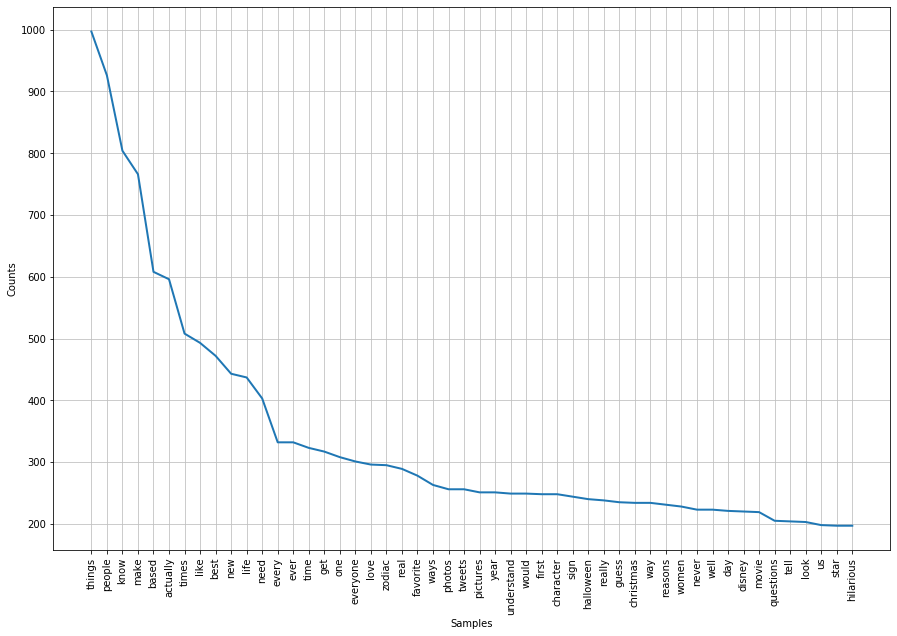

In [102]:
plt.figure(figsize=(15,10))
cb_nn_fdist.plot(50)

In [105]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [106]:
lemmatized_cb_nn=[]
for w in nonnum_in_cb:
    lemmatized_cb_nn.append(lemmatizer.lemmatize(w))

In [108]:
lemmatized_cb_nn_fdist = FreqDist(lemmatized_cb_nn)

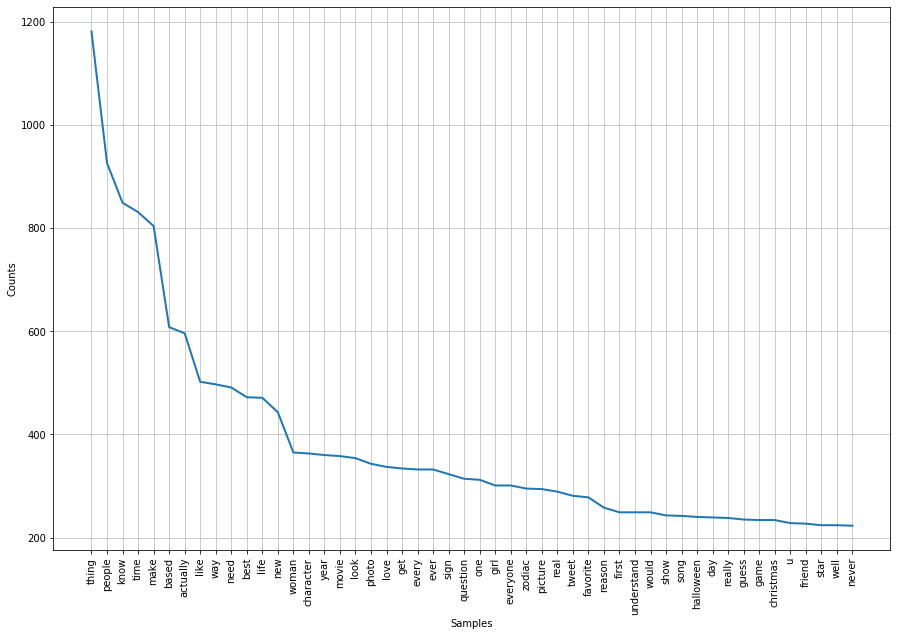

In [110]:
plt.figure(figsize=(15,10))
lemmatized_cb_nn_fdist.plot(50)

In [66]:
from nltk.probability import FreqDist

In [67]:
fdist = FreqDist(clean_flat_cb)

In [73]:
fdist.keys()

dict_keys(['get', 'bings', 'tv', 'female', 'friend', 'group', 'belong', 'new', 'star', 'wars', 'force', 'awakens', 'trailer', 'give', 'chills', 'vine', 'york', 'celebrity', 'big', 'brother', 'fucking', 'perfect', 'couple', 'stunning', 'photo', 'shoot', 'baby', 'learning', 'inoperable', 'brain', 'tumor', 'flirt', 'queer', 'girls', 'without', 'making', 'total', 'fool', '32', 'cute', 'things', 'distract', 'awkward', 'thanksgiving', 'disney', 'princesses', 'florida', 'quote', 'lyric', 'best', 'describes', 'depression', 'natalie', 'dormer', 'sam', 'claflin', 'play', 'game', 'see', 'actually', 'last', 'hunger', 'games', '16', 'responses', 'indian', 'patriarchy', '21', 'times', 'died', 'captain', 'america', 'civil', 'war', 'teaser', '17', 'kourtney', 'kardashian', 'shut', 'family', 'coffee', 'make', 'poop', 'ex', 'based', 'zodiac', 'hairdresser', 'struggles', 'every', 'black', 'girl', 'knows', 'true', 'walter', 'white', 'heisenberg', 'canadian', 'groom', 'ever', 'left', 'wedding', 'plow', 'gu

In [80]:
res = [i for i in fdist.keys() if i.isdigit()]
res

['32',
 '16',
 '21',
 '17',
 '15',
 '2016',
 '9',
 '8',
 '10',
 '6',
 '25',
 '29',
 '13',
 '23',
 '2015',
 '22',
 '100',
 '18',
 '27',
 '46',
 '58',
 '28',
 '19',
 '24',
 '42',
 '12',
 '20',
 '14',
 '11',
 '5',
 '1996',
 '31',
 '2',
 '7',
 '3',
 '2006',
 '33',
 '1955',
 '95',
 '4',
 '65',
 '51',
 '34',
 '80',
 '26',
 '38',
 '50',
 '53',
 '30',
 '36',
 '1915',
 '1',
 '37',
 '0',
 '93',
 '39',
 '108',
 '35',
 '40',
 '60',
 '41',
 '168',
 '500',
 '76',
 '2014',
 '72',
 '1989',
 '2019',
 '43',
 '2005',
 '48',
 '00',
 '45',
 '2008',
 '62',
 '49',
 '2003',
 '47',
 '2002',
 '89',
 '57',
 '55',
 '000',
 '44',
 '70',
 '2007',
 '59',
 '1995',
 '92',
 '90',
 '106',
 '61',
 '1994',
 '2018',
 '165',
 '69',
 '900',
 '101',
 '99',
 '90210',
 '2020',
 '103',
 '2010',
 '2009',
 '54',
 '98',
 '400',
 '2001',
 '78',
 '87',
 '82',
 '105',
 '56',
 '1983',
 '2011',
 '75',
 '155',
 '1975',
 '2017',
 '2004',
 '79',
 '495',
 '2024',
 '237',
 '1502',
 '2032',
 '300',
 '71',
 '97',
 '64',
 '85',
 '1921',
 '679',

In [82]:
cb_num_dist = {key: fdist[key] for key in res}

In [83]:
cb_num_dist

{'32': 49,
 '16': 256,
 '21': 645,
 '17': 676,
 '15': 350,
 '2016': 174,
 '9': 117,
 '8': 81,
 '10': 142,
 '6': 44,
 '25': 175,
 '29': 131,
 '13': 237,
 '23': 371,
 '2015': 506,
 '22': 268,
 '100': 58,
 '18': 353,
 '27': 212,
 '46': 7,
 '58': 3,
 '28': 65,
 '19': 583,
 '24': 226,
 '42': 20,
 '12': 172,
 '20': 125,
 '14': 169,
 '11': 177,
 '5': 71,
 '1996': 2,
 '31': 108,
 '2': 42,
 '7': 122,
 '3': 43,
 '2006': 13,
 '33': 45,
 '1955': 1,
 '95': 3,
 '4': 30,
 '65': 3,
 '51': 6,
 '34': 35,
 '80': 4,
 '26': 137,
 '38': 12,
 '50': 24,
 '53': 5,
 '30': 69,
 '36': 19,
 '1915': 1,
 '1': 33,
 '37': 25,
 '0': 2,
 '93': 1,
 '39': 26,
 '108': 1,
 '35': 22,
 '40': 13,
 '60': 4,
 '41': 17,
 '168': 1,
 '500': 6,
 '76': 3,
 '2014': 3,
 '72': 1,
 '1989': 16,
 '2019': 1,
 '43': 18,
 '2005': 12,
 '48': 8,
 '00': 2,
 '45': 11,
 '2008': 3,
 '62': 5,
 '49': 5,
 '2003': 1,
 '47': 8,
 '2002': 1,
 '89': 4,
 '57': 5,
 '55': 6,
 '000': 12,
 '44': 14,
 '70': 6,
 '2007': 7,
 '59': 7,
 '1995': 2,
 '92': 3,
 '90': 3

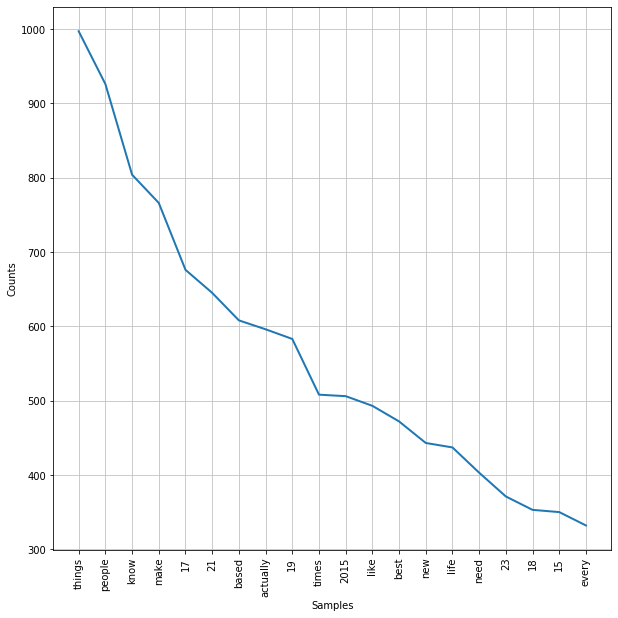

In [69]:
plt.figure(figsize=(10,10))
fdist.plot(20)

In [84]:
new_dict = {key:val for key, val in fdist.items() if key != res} 

In [86]:
new_dict.plot(20)

AttributeError: 'dict' object has no attribute 'plot'

In [87]:
type(fdist)

nltk.probability.FreqDist

In [103]:
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'wordcloud'

# Feature Engineering

In [4]:
data['headline'] = data['headline'].apply(lambda x: x.lower())

In [5]:
data

,headline,clickbait
0,should i get bings,1
1,which tv female friend group do you belong in,1
2,"the new ""star wars: the force awakens"" trailer...",1
3,"this vine of new york on ""celebrity big brothe...",1
4,a couple did a stunning photo shoot with their...,1
...,...,...
31995,"to make female hearts flutter in iraq, throw a...",0
31996,"british liberal democrat patsy calton, 56, die...",0
31997,drone smartphone app to help heart attack vict...,0
31998,"netanyahu urges pope benedict, in israel, to d...",0
